# Перегляд результатів обробки відео нейромережею 

## Отримати перші 50 записів з логу /app/video/detections_log.jsonl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Читаємо файл
df = pd.read_json('/app/video/detections_log.jsonl', lines=True)

# Перетворюємо час у нормальний формат
df['timestamp'] = pd.to_datetime(df['timestamp'])

display(df.head(50))


,ok,filename,detected,count,timestamp
0,True,20260223-144657.avi,[],0,2026-02-23 14:47:56.697779
1,True,20260223-144819.avi,"[person, tv, microwave, oven, keyboard]",5,2026-02-23 14:49:15.581433
2,True,20260223-144923.avi,[tv],1,2026-02-23 14:50:21.171055
3,True,20260223-144953.avi,"[person, bicycle, cow]",3,2026-02-23 14:50:53.121085
4,True,20260223-145148.avi,"[tv, person, cat]",3,2026-02-23 14:52:49.402444
5,True,20260223-145218.avi,"[cow, person, cat]",3,2026-02-23 14:53:18.309112
6,True,20260225-131639.avi,[traffic light],1,2026-02-25 13:17:26.873233
7,True,20260225-132752.avi,[traffic light],1,2026-02-25 13:28:39.076062
8,True,20260225-130240.avi,[],0,2026-02-25 16:47:42.777026
9,True,20260225-130240.avi,[],0,2026-02-25 16:52:27.875985


##  Приклад аналізу: скільки разів бачили кота за сьогодні?

In [2]:
cats_count = df[df['detected'].apply(lambda x: 'cat' in x)].shape[0]
print(f"Кіт з'являвся в кадрі {cats_count} разів")

Кіт з'являвся в кадрі 6 разів


## Побудова графіку активності

Text(0.5, 1.0, 'Активність детекцій по годинах')

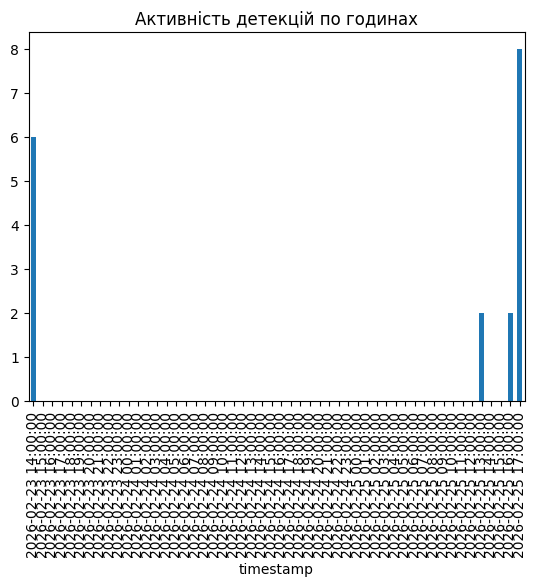

In [3]:
df.resample('h', on='timestamp').count()['filename'].plot(kind='bar')
plt.title("Активність детекцій по годинах")